### Data Details:
- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: The customer has passport or not
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfactory score
- ProductPitched: Product pitched by a salesperson
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- DurationOfPitch: Duration of the pitch by a salesman to customer

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.exceptions
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
##,StackingRegressor
#from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_excel("Tourism.xlsx")

In [3]:
#data has multiple worksheet
data1 = pd.read_excel("Tourism.xlsx", 'Data Dict')
data2 = pd.read_excel("Tourism.xlsx", 'Tourism')

In [4]:
tour=data2.copy()

In [5]:
data1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Tourism,CustomerID,Unique customer ID
2,NaN,Tourism,ProdTaken,Product taken flag
3,NaN,Tourism,Age,Age of customer
4,NaN,Tourism,TypeofContact,How customer was contacted (Company Invited or...


In [5]:
data2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [59]:
tour.shape

(4888, 20)

In [60]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
CustomerID                 4888 non-null int64
ProdTaken                  4888 non-null int64
Age                        4662 non-null float64
TypeofContact              4863 non-null object
CityTier                   4888 non-null int64
DurationOfPitch            4637 non-null float64
Occupation                 4888 non-null object
Gender                     4888 non-null object
NumberOfPersonVisited      4888 non-null int64
NumberOfFollowups          4843 non-null float64
ProductPitched             4888 non-null object
PreferredPropertyStar      4862 non-null float64
MaritalStatus              4888 non-null object
NumberOfTrips              4748 non-null float64
Passport                   4888 non-null int64
PitchSatisfactionScore     4888 non-null int64
OwnCar                     4888 non-null int64
NumberOfChildrenVisited    4822 non-null float64
Designation                488

- There are incomlete rows on this data
- We can transform object type into category

In [61]:
tour.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

- Some columns shows null values

### Fixing Data type

In [7]:
cols = tour.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [8]:
for i in cols.columns:
    tour[i] = tour[i].astype('category')

In [9]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
CustomerID                 4888 non-null int64
ProdTaken                  4888 non-null int64
Age                        4662 non-null float64
TypeofContact              4863 non-null category
CityTier                   4888 non-null int64
DurationOfPitch            4637 non-null float64
Occupation                 4888 non-null category
Gender                     4888 non-null category
NumberOfPersonVisited      4888 non-null int64
NumberOfFollowups          4843 non-null float64
ProductPitched             4888 non-null category
PreferredPropertyStar      4862 non-null float64
MaritalStatus              4888 non-null category
NumberOfTrips              4748 non-null float64
Passport                   4888 non-null int64
PitchSatisfactionScore     4888 non-null int64
OwnCar                     4888 non-null int64
NumberOfChildrenVisited    4822 non-null float64
Designation         

### Summary of the dataset

In [9]:
tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- Age: Min 18 and Max 61. And is missing some values.
- Duration of Pitch average can take 15 min
- Customers used to travel as a group of 3 or 4 people
- The seller tends to return contact with the customer approximately 4 times
- Customers prefer accommodation with a score of 3 to 5.
- Customers use to travel 3 times a year
- More than 60% of customer own a car
- The number of customers with children have an average of 1.18
- Monthly income: Th monthly income range between 1k to 98k

### Checking Missing Values

In [10]:
pd.DataFrame( tour.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisited,0
NumberOfFollowups,45


In [11]:
## Replacing missing values with mean
tour['DurationOfPitch'].fillna(tour.DurationOfPitch.mean(), inplace = True)
tour['MonthlyIncome'].fillna(tour.MonthlyIncome.mean(), inplace = True)

In [12]:
## Replacing missing values with median
tour['Age'].fillna(tour.Age.median(), inplace = True)
tour['PreferredPropertyStar'].fillna(tour.PreferredPropertyStar.median(), inplace = True)
tour['NumberOfFollowups'].fillna(tour.NumberOfFollowups.median(), inplace = True)
tour['NumberOfTrips'].fillna(tour.NumberOfTrips.median(), inplace = True)
tour['NumberOfChildrenVisited'].fillna(tour.NumberOfChildrenVisited.median(), inplace = True)

In [13]:
## Replacing missing values customized
tour['TypeofContact'].fillna("Self Enquiry", inplace = True)

In [14]:
## Review Missing Values
pd.DataFrame( tour.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisited,0
NumberOfFollowups,0


In [71]:
## Check Summary to verify any significant change
tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.547259,9.104795,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.490835,8.297971,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- All columns show 4888 rows. No significant changes identified after recover missing values

In [15]:
## Dropping columns which are not adding any information.
tour.drop(['CustomerID'],axis=1,inplace=True)

In [16]:
## Count values of each columns for more observations
print(tour.ProdTaken.value_counts())
print(tour.TypeofContact.value_counts())
print(tour.DurationOfPitch.value_counts())
print(tour.PitchSatisfactionScore.value_counts())
print(tour.CityTier.value_counts())
print(tour.Occupation.value_counts())
print(tour.Gender.value_counts())
print(tour.NumberOfPersonVisited.value_counts())
print(tour.NumberOfFollowups.value_counts())
print(tour.ProductPitched.value_counts())
print(tour.PreferredPropertyStar.value_counts())
print(tour.MaritalStatus.value_counts())
print(tour.NumberOfTrips.value_counts())
print(tour.Passport.value_counts())
print(tour.OwnCar.value_counts())
print(tour.NumberOfChildrenVisited.value_counts())
print(tour.Designation.value_counts())

0    3968
1     920
Name: ProdTaken, dtype: int64
Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
9.000000      483
7.000000      342
8.000000      333
6.000000      307
16.000000     274
15.000000     269
14.000000     253
15.490835     251
10.000000     244
13.000000     223
11.000000     205
12.000000     195
17.000000     172
30.000000      95
22.000000      89
31.000000      83
23.000000      79
18.000000      75
29.000000      74
32.000000      74
21.000000      73
25.000000      73
27.000000      72
26.000000      72
24.000000      70
35.000000      66
20.000000      65
28.000000      61
33.000000      57
19.000000      57
34.000000      50
36.000000      44
5.000000        6
126.000000      1
127.000000      1
Name: DurationOfPitch, dtype: int64
3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
Salaried          2368
Small Business    2084
Larg

- The column Gender show duplicated value under name "Fe Male" > as Female
- The column Marital Status show duplicated values under name "Unmarried" > as Single

### Fixing Column Gender and Marital Status

In [17]:
conditions = [
    (tour["Gender"] == 'Fe Male'),
    (tour["Gender"] == 'Female'),
    (tour["Gender"] == 'Male'),
    ]
values = ['Female', 'Female', 'Male']
tour['Gender'] = np.select(conditions, values)
print(tour.Gender.value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


In [18]:
conditions = [
    (tour["MaritalStatus"] == 'Married'),
    (tour["MaritalStatus"] == 'Divorced'),
    (tour["MaritalStatus"] == 'Single'),
    (tour["MaritalStatus"] == 'Unmarried'),
    ]
values = ['Married', 'Divorced', 'Single','Single']
tour['MaritalStatus'] = np.select(conditions, values)
print(tour.MaritalStatus.value_counts())

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


### EDA: Univariate analysis

In [76]:
#Building boxplot and histogram for any input numerical variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

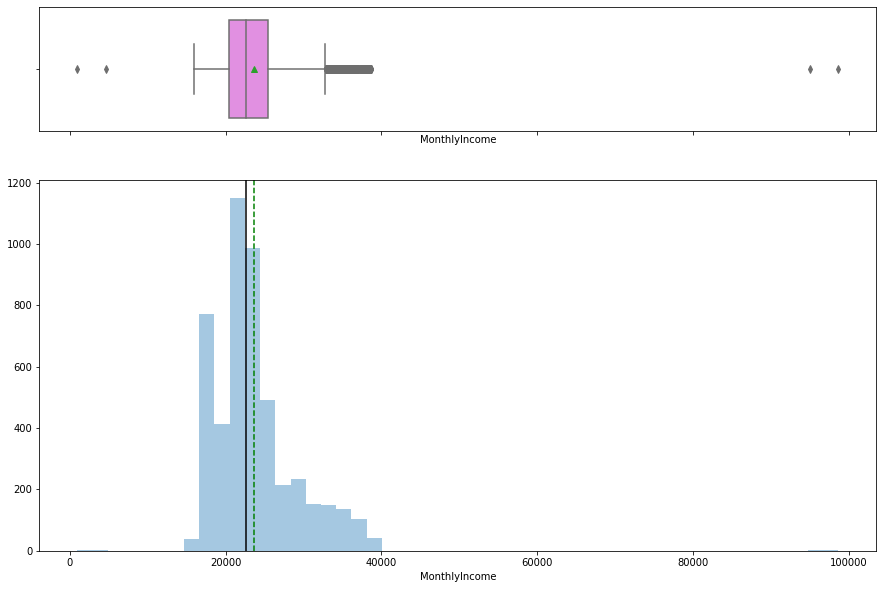

In [137]:
# Observations on Monthly Income
histogram_boxplot(tour['MonthlyIncome'])

- There are outliers in the distribution os this variables.
- This variable is concentrated.

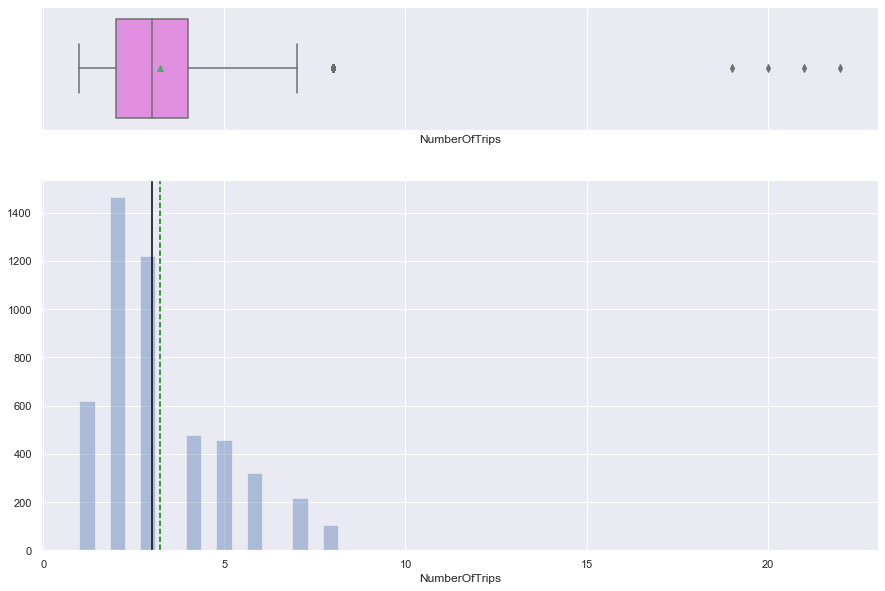

In [191]:
histogram_boxplot(tour['NumberOfTrips'])

- Distribution is not symmetric but mean and median are approx 3
- There are few outliers in this variable

In [292]:
## Function to create barplots that indicate percentage for each category
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(8,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot


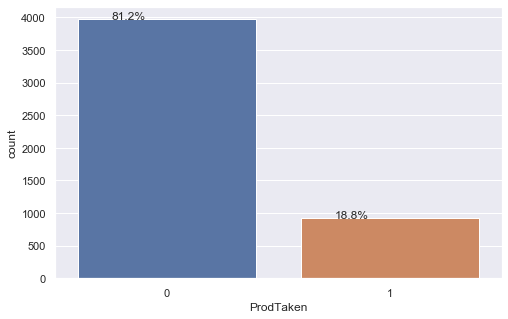

In [293]:
perc_on_bar(tour['ProdTaken'])

- 18% of the customers in this data purchased the packages offered by the company

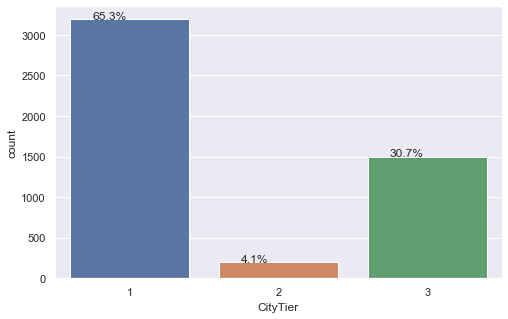

In [194]:
perc_on_bar(tour['CityTier'])

- City Tier 1 shows that 65.3% of the customers are located in cities densely populated and have higher living expenses.

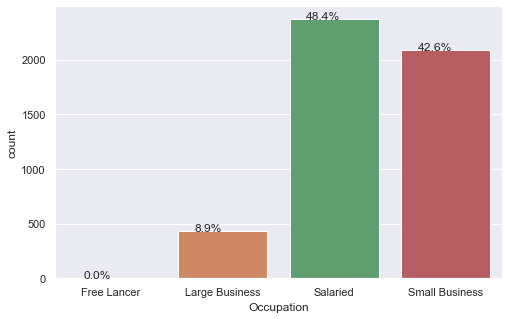

In [195]:
perc_on_bar(tour['Occupation'])

- 48.4% of the customers are salaried, while 42.6% work on Small Business  

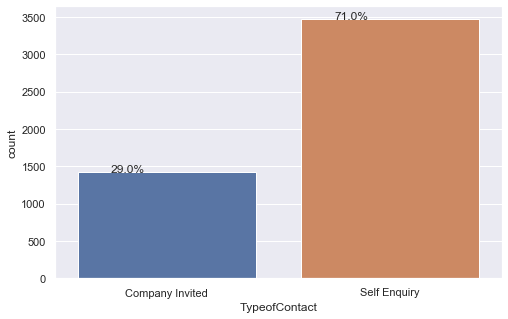

In [196]:
perc_on_bar(tour['TypeofContact'])

- Normally the customer look for this service confirmed by 71% of Type of Contact is Self Enquiry

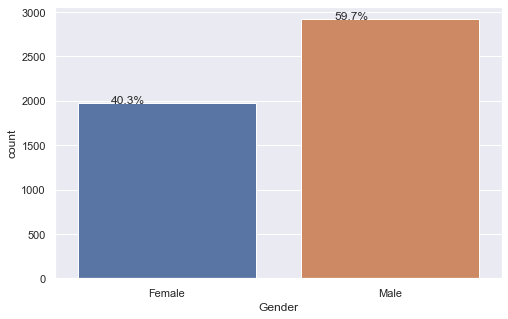

In [197]:
perc_on_bar(tour['Gender'])

- Male customers are 59.7%, while Female are 40.3%

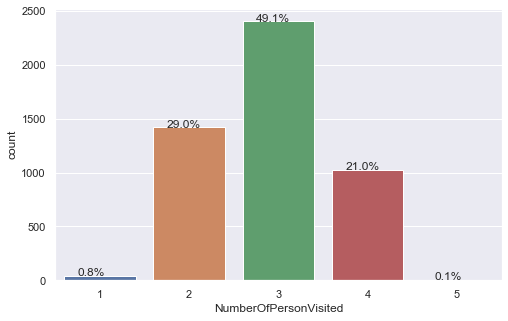

In [198]:
perc_on_bar(tour['NumberOfPersonVisited'])

- Normally 3 people are involved in the same trip. 

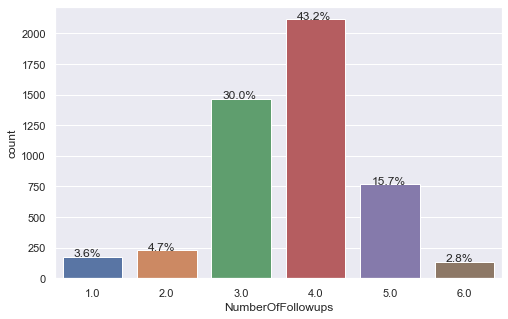

In [199]:
perc_on_bar(tour['NumberOfFollowups'])

- Normally a salesperson contact the customer around 4 times. 

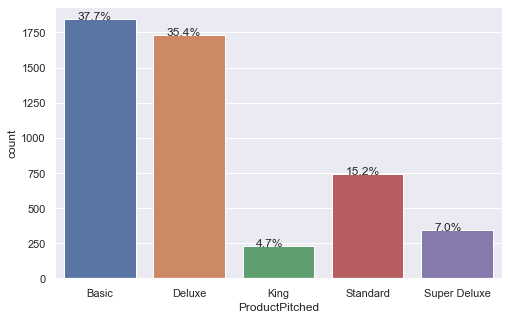

In [200]:
perc_on_bar(tour['ProductPitched'])

- The company offer 5 types of packages when the Basic is the most sold, fallowed by Deluxe and Standard

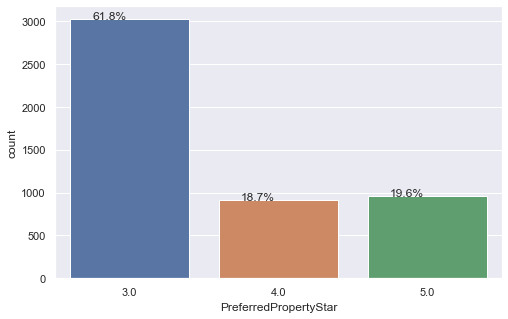

In [201]:
perc_on_bar(tour['PreferredPropertyStar'])

- 61.8% of the customer stay in hotels under category 3. 

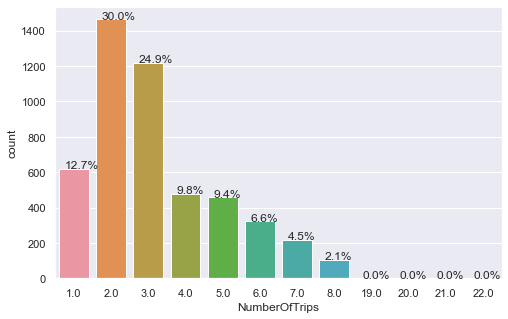

In [202]:
perc_on_bar(tour['NumberOfTrips'])

- 30% of the customer use to travel 2 times a year, but 24.9% travel 3 times a year.

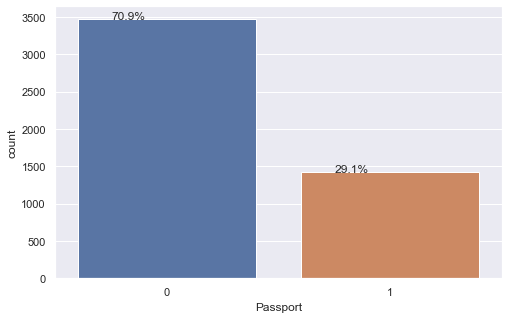

In [203]:
perc_on_bar(tour['Passport'])

- 70.9% of the customer dont have passport.

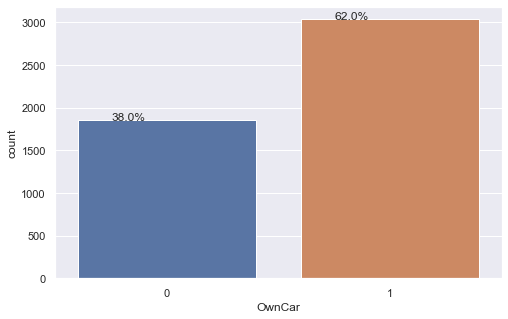

In [205]:
perc_on_bar(tour['OwnCar'])

- 62% of the clients own a car

### EDA: Bivariate analysis

In [19]:
## Function to plot stacked bar chart
# The intention is to verify the correlation between the population that purchased any package with all other values
def stacked_plot(x):
    sns.set(palette='coolwarm')
    tab1 = pd.crosstab(x,tour['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,tour['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

ProdTaken     0    1   All
Age                       
18.0          6    8    14
19.0         11   21    32
20.0         13   25    38
21.0         18   23    41
22.0         31   15    46
23.0         33   13    46
24.0         38   18    56
25.0         54   20    74
26.0         69   37   106
27.0        108   30   138
28.0        121   26   147
29.0        121   57   178
30.0        151   48   199
31.0        162   41   203
32.0        157   40   197
33.0        149   40   189
34.0        167   44   211
35.0        203   34   237
36.0        386   71   457
37.0        161   24   185
38.0        161   15   176
39.0        136   14   150
40.0        123   23   146
41.0        131   24   155
42.0        122   20   142
43.0        120   10   130
44.0         88   17   105
45.0         98   18   116
46.0        110   11   121
47.0         76   12    88
48.0         54   11    65
49.0         56    9    65
50.0         74   12    86
51.0         73   17    90
52.0         54   14    68
5

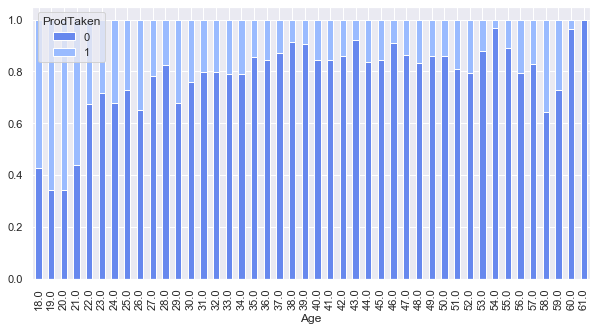

In [295]:
# Checking the Age of the population that purchased a package
stacked_plot(tour['Age'])

- The clients most likely to buy tour packages are young population range 19 to 30 years old

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


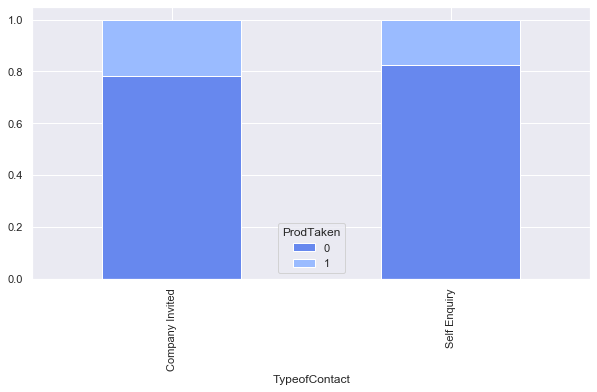

In [296]:
# Checking the relation of Type of Contact and purchased completed in the past
stacked_plot(tour['TypeofContact'])

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


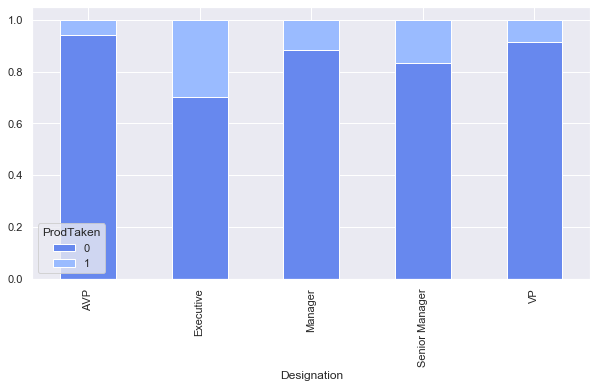

In [297]:
# Checking the relation between Designation and  Prod purchased.
stacked_plot(tour['Designation'])

- Executives and Senior Managers are the population interested in to travel


ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


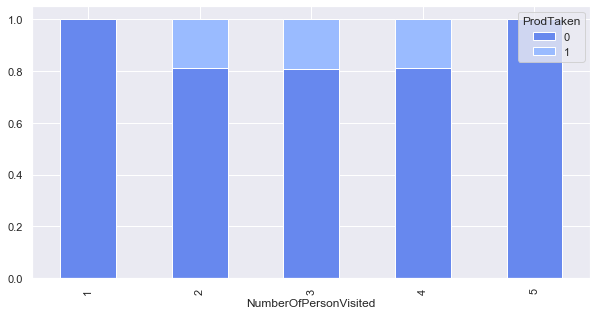

In [209]:
# Checking the relation between Numbe rOf Person Visited and Prod purchased.
stacked_plot(tour['NumberOfPersonVisited'])

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single         1128  470  1598
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


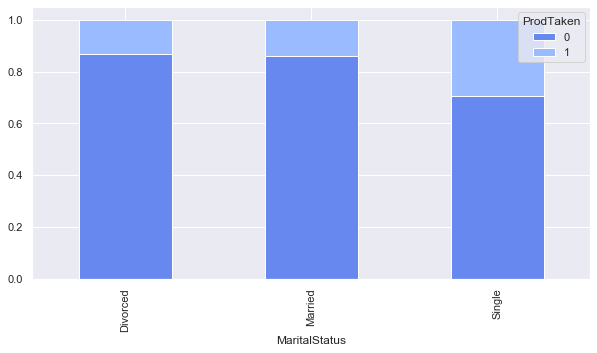

In [210]:
# Checking the relation between Marital Status and Prod purchased.
stacked_plot(tour['MaritalStatus'])

- Singles used to purchase more travel packages

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


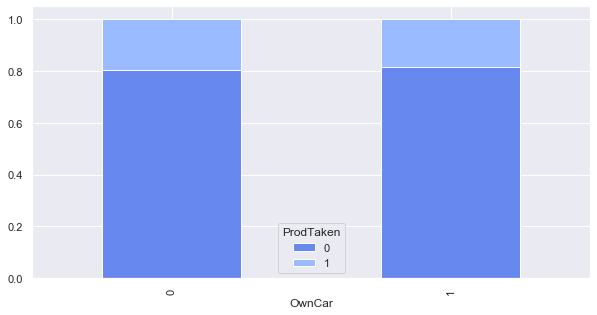

In [211]:
# Checking the relation between Own car and Prod purchased.
stacked_plot(tour['OwnCar'])

- The population with car purchased more packages than the population without car, but is not so significant.

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1747  399  2146
2.0                      1082  253  1335
3.0                       259   66   325
All                      3968  920  4888
------------------------------------------------------------------------------------------------------------------------


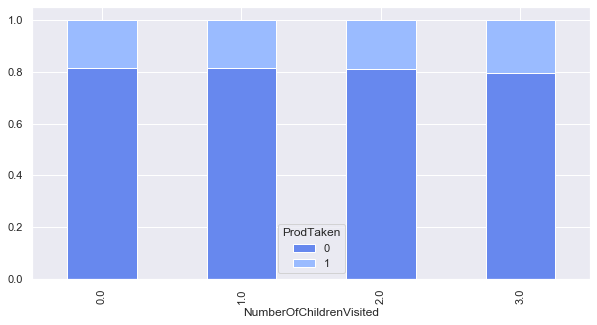

In [212]:
# Checking the relation between Number Of Children Visited and Prod purchased.
stacked_plot(tour['NumberOfChildrenVisited'])

- The number of children visited does not influence the final purchase decision.

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


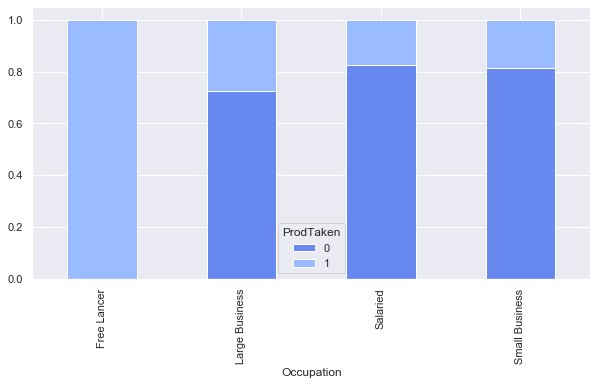

In [213]:
# Checking the relation between Occupation and Prod purchased.
stacked_plot(tour['Occupation'])

#### Ocupation tend to purchase travel packages: 
    - 100% of Free Lancer
    - 38.21% of Large Business
    - 21.18% of Salaried
    - 22.58% of Small Business

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


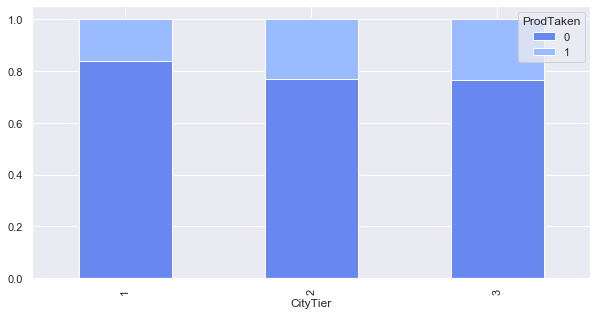

In [214]:
# Checking the relation between CityTier and Prod purchased.
stacked_plot(tour['CityTier'])

- Most of the customers that purchased travel packages located in City Tier 3

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


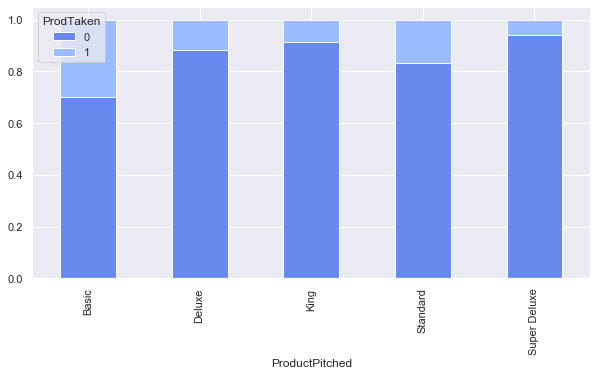

In [215]:
# Checking the relation between Product Pitched and Prod purchased.
stacked_plot(tour['ProductPitched'])

- The Basic package was the best seller followed by the Deluxe package.

ProdTaken              0    1   All
DurationOfPitch                    
5.0                    6    0     6
6.0                  268   39   307
7.0                  294   48   342
8.0                  273   60   333
9.0                  404   79   483
10.0                 199   45   244
11.0                 168   37   205
12.0                 162   33   195
13.0                 191   32   223
14.0                 212   41   253
15.0                 217   52   269
15.490834591330602   206   45   251
16.0                 218   56   274
17.0                 148   24   172
18.0                  56   19    75
19.0                  36   21    57
20.0                  46   19    65
21.0                  57   16    73
22.0                  66   23    89
23.0                  58   21    79
24.0                  54   16    70
25.0                  59   14    73
26.0                  60   12    72
27.0                  58   14    72
28.0                  44   17    61
29.0                  53   2

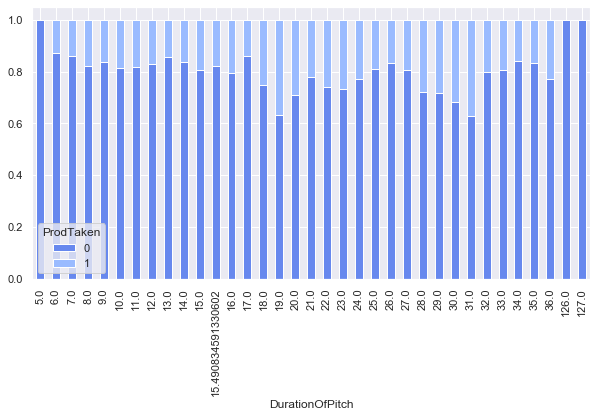

In [20]:
stacked_plot(tour['DurationOfPitch'])

- 19 to 30 minutes is the time duration of the pitch when the client decided to purchase a package

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


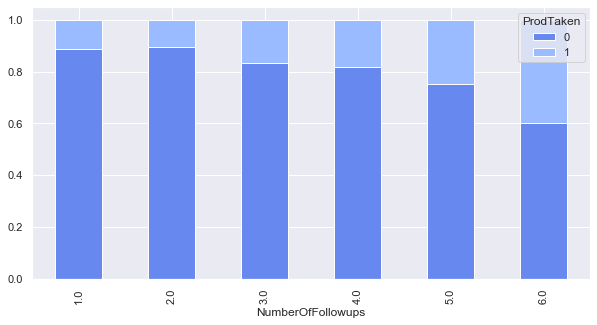

In [216]:
# Checking the relation between Product Pitched and Prod purchased.
stacked_plot(tour['NumberOfFollowups'])

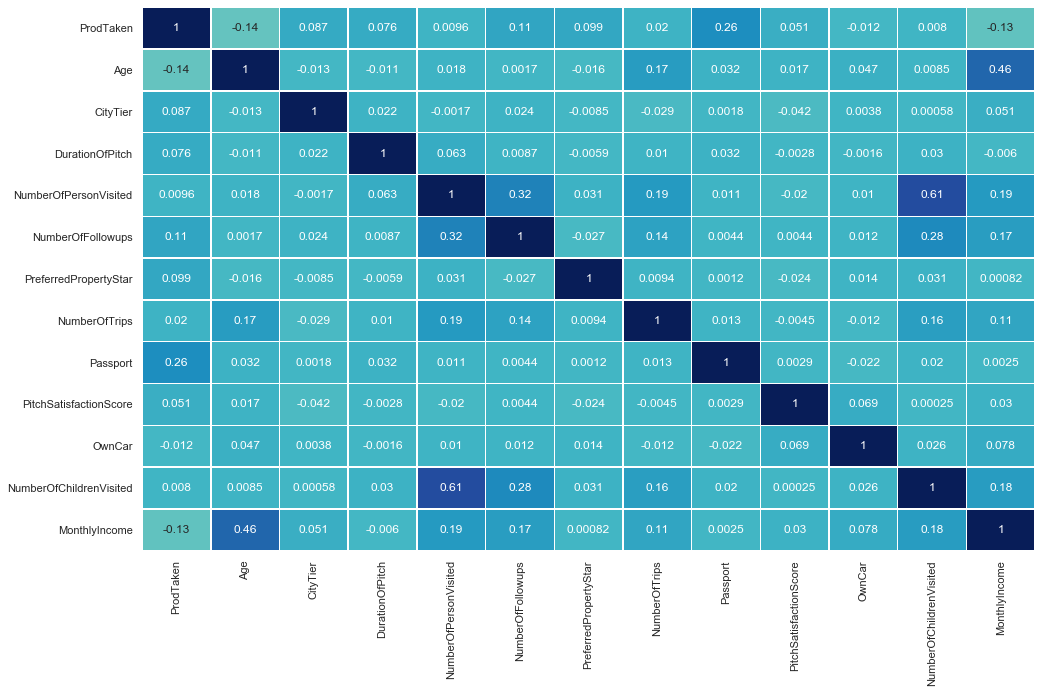

In [298]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(tour.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- We can see the Prod Taken shows balanced relationship with all values
- Number of Person visitid has good relationship  with number of Chilren visited
- The passport shows the ability of the customer to travel internally. Since data shows a low population with passport the relationship between passport and the Number of Trip is low.
- Age and Monthly Income show good relationship


### Replace Structure

In [21]:
replaceStruct = {
                "ProductPitched": {"Basic":1, "Deluxe":2, "Standard":3, "Super Deluxe":4, "King":5},
                "Designation": { "Executive":1, "Manager":2, "Senior Manager":3, "AVP":4, "VP":5}
                    }
oneHotCols=["TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus","Designation"]


In [22]:
tour=tour.replace(replaceStruct)
tour=pd.get_dummies(tour, columns=oneHotCols)
tour.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_4,ProductPitched_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_1,Designation_2,Designation_3,Designation_4,Designation_5
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,1,0,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,1,0,0,0,1,0,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,1,0,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,1,0,0,1,0,0,0,0
4,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,1,0,0,1,0,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,0,0,0,0,1,1,0,0,0,0
6,0,59.0,1,9.0,2,2.0,5.0,5.0,1,2,...,0,0,1,0,0,1,0,0,0,0
7,0,30.0,1,30.0,3,3.0,3.0,2.0,0,2,...,0,0,0,1,0,1,0,0,0,0
8,0,38.0,1,29.0,2,4.0,3.0,1.0,0,3,...,0,0,0,0,1,0,0,1,0,0
9,0,36.0,1,33.0,3,3.0,3.0,7.0,0,3,...,0,0,1,0,0,0,1,0,0,0


In [79]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 34 columns):
ProdTaken                        4888 non-null int64
Age                              4888 non-null float64
CityTier                         4888 non-null int64
DurationOfPitch                  4888 non-null float64
NumberOfPersonVisited            4888 non-null int64
NumberOfFollowups                4888 non-null float64
PreferredPropertyStar            4888 non-null float64
NumberOfTrips                    4888 non-null float64
Passport                         4888 non-null int64
PitchSatisfactionScore           4888 non-null int64
OwnCar                           4888 non-null int64
NumberOfChildrenVisited          4888 non-null float64
MonthlyIncome                    4888 non-null float64
TypeofContact_Company Invited    4888 non-null uint8
TypeofContact_Self Enquiry       4888 non-null uint8
Occupation_Free Lancer           4888 non-null uint8
Occupation_Large Business      

### Split the data into train and test sets

In [23]:
X = tour.drop("ProdTaken" , axis=1)
y = tour.pop("ProdTaken")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [25]:
X_train.shape, X_test.shape

((3421, 33), (1467, 33))

- We have 3421 observations in the train set and 1467 observations in the test set.

In [22]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [23]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Building Models Part I - Bagging
- Decision Tree
- Bagging Classifier
- Random Forest

### Model evaluation criterion 

Based in our goal:
- True Hit is the customer that will purchase the item
- False Negative is the customer that was targeted but will not purchase the item.


### Calculate Accuracy, Recall & Precision, and plot the confusion matrix

In [24]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [25]:
##  Function to calculate recall score - Minimize False Positive
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores


In [26]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [27]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1. Decision Tree Model 

In [28]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [29]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

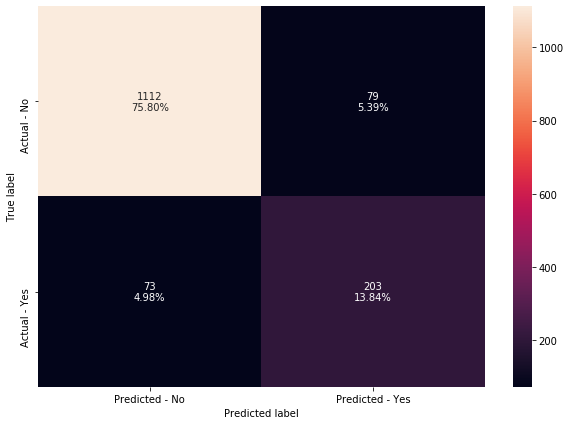

In [30]:
make_confusion_matrix(dtree,y_test)

- Tota correct prediction in this model is 89.64%
- False Negative: 4.98%. Number of customers expected to buy the product, but ended up not buying.

In [31]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.896387184730743
Recall on training set :  1.0
Recall on test set :  0.7355072463768116
Precision on training set :  1.0
Precision on test set :  0.7198581560283688


- Your model is overfitting your training data because the model performs well on the training data but does not perform as the same on the test data. We can try to improve this performance.

### 2. Bagging Classifier

In [32]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

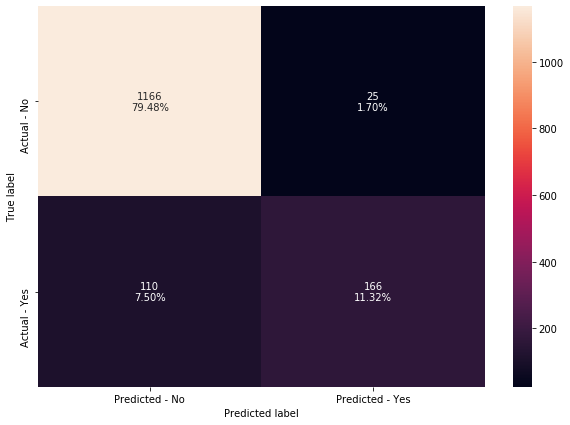

In [33]:
make_confusion_matrix(bagging,y_test)

- Total correct prediction in this model is 90.80%
- False Negative rate is 7.50%. Number of customers expected to buy the product, but ended up not buying.

In [34]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9079754601226994
Recall on training set :  0.9720496894409938
Recall on test set :  0.6014492753623188
Precision on training set :  0.9968152866242038
Precision on test set :  0.8691099476439791


- Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall. Accuracy is high on Bagging Classifier

### Bagging Classifier with weighted decision tree

In [35]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=

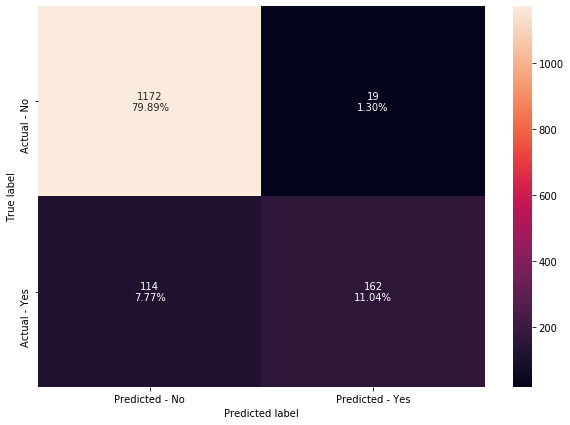

In [36]:
make_confusion_matrix(bagging_wt,y_test)

In [37]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.9093387866394002
Recall on training set :  0.9751552795031055
Recall on test set :  0.5869565217391305
Precision on training set :  0.9968253968253968
Precision on test set :  0.8950276243093923


- Bagging classifier with a weighted decision tree is an alternative to improve the model. Here is giving good accuracy of 90.93% and prediction but is not able to generalize well on test data in terms of recall. 

### Random Forest Classifier

In [38]:
#Train the random forest classifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

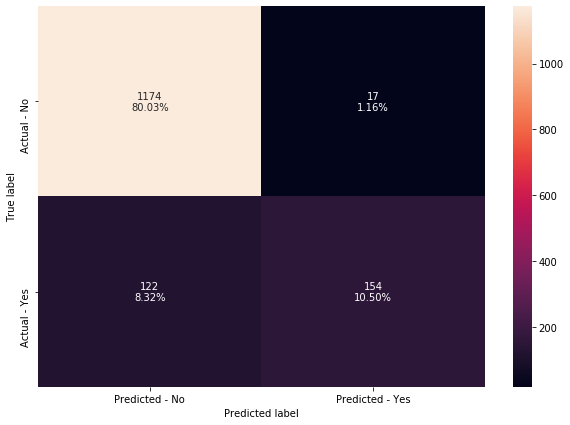

In [39]:
make_confusion_matrix(rf,y_test)

In [40]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9052488070892979
Recall on training set :  0.9720496894409938
Recall on test set :  0.5579710144927537
Precision on training set :  0.9984051036682615
Precision on test set :  0.9005847953216374


- Random Forest has performed well in terms of accuracy and precision, but is running poorly on the Recall test data. Also we can see overfitting data.

### Random forest with class weights

In [41]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

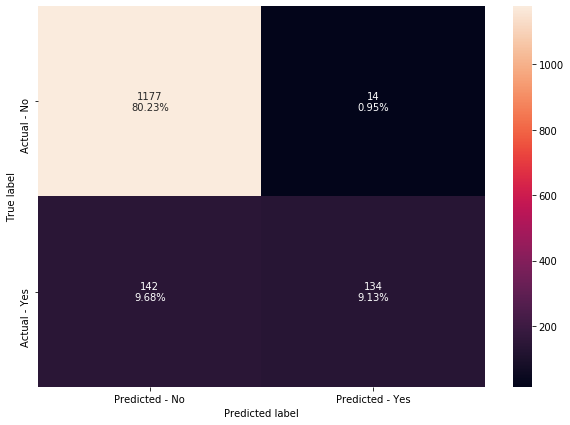

In [42]:
make_confusion_matrix(rf_wt,y_test)

In [43]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.8936605316973415
Recall on training set :  0.9704968944099379
Recall on test set :  0.4855072463768116
Precision on training set :  1.0
Precision on test set :  0.9054054054054054


- Weighted Random Forest does not add many improvements. The recall test actually decreases if compared to the unweighted random forest.

## Check Tuning Models - Using GridSearch for Hyperparameter

- Models so far could performance better, let's try tuning to open the possibility of the model shows better performance
- Lets use the Grid search to compute the optimum values of hyperparameters. 

### Tuning Decision Tree

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

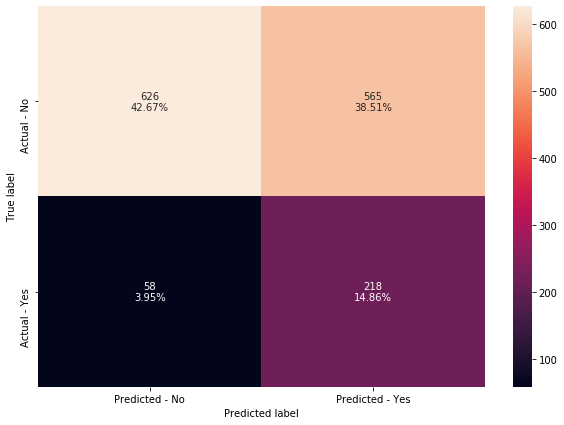

In [46]:
make_confusion_matrix(dtree_estimator,y_test)

In [47]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.5811166325635779
Accuracy on test set :  0.5753237900477164
Recall on training set :  0.7639751552795031
Recall on test set :  0.7898550724637681
Precision on training set :  0.27749576988155666
Precision on test set :  0.2784163473818646


- This model is showing that Test Data and Training Data are close to each other, which proves good efficiency.

### Tuning Bagging Classifier

In [48]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0:...
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                          

In [49]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=

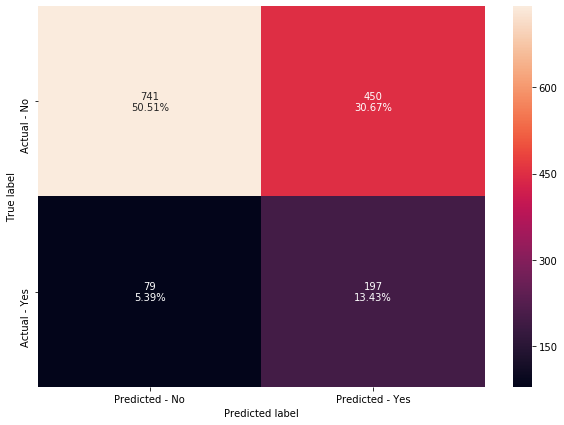

In [50]:
make_confusion_matrix(bagging_estimator,y_test)

In [51]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  0.6132709733995908
Accuracy on test set :  0.6394001363326517
Recall on training set :  0.6444099378881988
Recall on test set :  0.7137681159420289
Precision on training set :  0.27501656726308815
Precision on test set :  0.3044822256568779


-  Like the tuned Decision Tree, the tuned bagging also shows a better balance between test and training. Test data are a little bit bigger than Training.

### Tuning Random Forest

In [52]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,"log2","auto"],
        #"max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=251,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

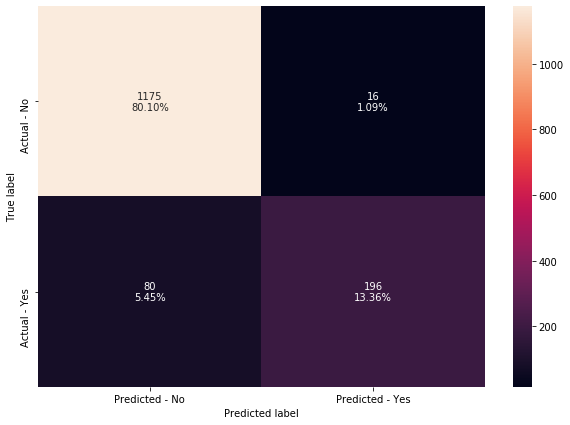

In [53]:
make_confusion_matrix(rf_estimator,y_test)

In [54]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.934560327198364
Recall on training set :  1.0
Recall on test set :  0.7101449275362319
Precision on training set :  1.0
Precision on test set :  0.9245283018867925


- Random Forest after tuning shows signd of overfitting. But still, the Recall on test need improvements.

## Comparing all the Models

In [55]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [56]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.896387,1.000000,0.735507,1.000000,0.719858
1,Tuned Decision Tree,0.581117,0.575324,0.763975,0.789855,0.277496,0.278416
2,Bagging Classifier,0.994154,0.907975,0.972050,0.601449,0.996815,0.869110
3,Weighted Bagging Classifier,0.994738,0.909339,0.975155,0.586957,0.996825,0.895028
4,Tuned Bagging Classifier,0.613271,0.639400,0.644410,0.713768,0.275017,0.304482
5,Random Forest,0.994446,0.905249,0.972050,0.557971,0.998405,0.900585
6,Weighted Random Forest,0.994446,0.893661,0.970497,0.485507,1.000000,0.905405
7,Tuned Random Forest,1.000000,0.934560,1.000000,0.710145,1.000000,0.924528


- Decision Tree shows good performance on the Training set but not so well on Testing Set
- Bagging classifier overfitted the data before tuning.
- Decision Tree, Bagging Classifier and Random Forest is overfitting the data
- Tuning process helps bring balance to the data
- Tuned Decision Tree is showing Test_Recall bigger than Train_Recall. Also, the high Recall means  low false negative rate, however the low Precision means  high false positive rate
- Tuned Bagging Classifier is following the same scenario as Tuned Decision Tree.
- Best two models is Tuned Decision Tree and Tuned Bagging Classifier.
- Random Forest is not showing significant changes after tuning or weight.

In [189]:
# importance of features in the tree building. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Age                            0.121722
MonthlyIncome                  0.118929
DurationOfPitch                0.094858
Passport                       0.069542
NumberOfTrips                  0.065823
NumberOfFollowups              0.057246
PitchSatisfactionScore         0.053416
PreferredPropertyStar          0.043341
CityTier                       0.034931
MaritalStatus_Single           0.034662
NumberOfPersonVisited          0.029405
NumberOfChildrenVisited        0.026775
Occupation_Small Business      0.022134
TypeofContact_Self Enquiry     0.020903
Gender_Female                  0.019430
ProductPitched_1               0.018878
OwnCar                         0.018720
Occupation_Salaried            0.018642
Occupation_Large Business      0.018609
Gender_Male                    0.018371
TypeofContact_Company Invited  0.016776
Designation_1                  0.015709
MaritalStatus_Married          0.012846
MaritalStatus_Divorced         0.012741


In [190]:
feature_names = X_train.columns

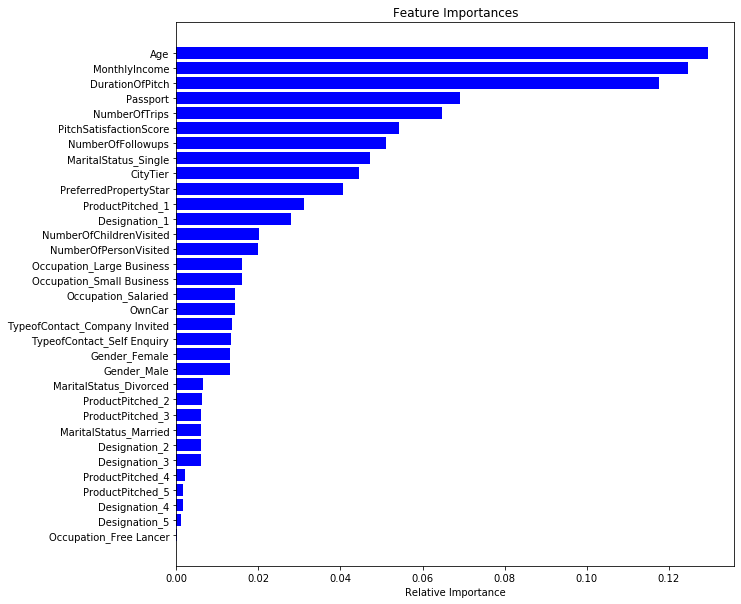

In [193]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important value for the prediction, fallowed by Monthly Income and Duration of Pitch. 
- Marital Status Single show more importante than Married
- Occupation Large or Small business have almost the same importance, like Gender Female and Male.

## Business Insights and Recommendations

The predict model presented above can help the Travel Agency:

- Identify the characteristic of the client most likely to purchase a travel package
- The Travel Agency can have insights about the best approach used by the sales team.


* Important values to consider: - Age, Monthly Income, Duration of Pitch and Passport
* Age: Adults between 19 to 25 are more likely to purchase this item. 

* Monthly Income will decide the power of purchase

* The Duration of Picth help the client understand details about the product but must be short, no more than 30 

* Passport also is an important factor, since the correct documentation will avoid restrictions.

* Clients with Marital Status single is most likely to spend financial resources traveling since this population doesn't have other responsibilities.

* Location is a good topic to consider when marketing sinde the value City Tier is showing as the number 9 as importance.

* Men and women will be equal in the purchase decision

* When the customer is already married, they lose interest in this industry, but there is a population that will travel in family.

## Building Model part II - Boosting

In [57]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

# Boosting Models

## AdaBoost Regressor

In [58]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [59]:
ab_regressor_score=get_model_score(ab_regressor)

R-square on training set :  0.175476230392547
R-square on test set :  0.21274281406055873
RMSE on training set :  0.35495997852464833
RMSE on test set :  0.3467676894201917


- Training and Test in R-Square and RMSE are very similar. We can see low performance on AdaBoosting.

## Hyperparameter Tuning AdaBoost

In [60]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=20, random_state=1)

In [61]:
ab_tuned_score=get_model_score(ab_tuned)

R-square on training set :  0.19448527250617098
R-square on test set :  0.2161771285702606
RMSE on training set :  0.35084439436670223
RMSE on test set :  0.34601049661916683


- Is not showing significant changes after tuning.

## Gradient Boosting Regressor

In [62]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [63]:
gb_estimator_score=get_model_score(gb_estimator)

R-square on training set :  0.4170411821080414
R-square on test set :  0.352198281590277
RMSE on training set :  0.2984672865455434
RMSE on test set :  0.3145584497373757


- Gradient boosting is performing better than Ada boosting. RMSE Training is close to RMASE Test.

## Hyperparameter Tuning Gradient

In [64]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=0.7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=175,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [65]:
gb_tuned_score=get_model_score(gb_tuned)

R-square on training set :  0.9999759156686475
R-square on test set :  0.7076511366003826
RMSE on training set :  0.00191842619648912
RMSE on test set :  0.21131533410416775


- This model has improved in terms of r2 score and RMSE.
- The r2 score has increase by approx 30 on the test data.
- RMSE has decreased approx 10 on the test data.

## XGBoost Regressor

* “Because of Python Tech Issue, I found very difficult to import and run XGBoost and Stacking Model. Due to the lack of Tech Support these two methods were attempted to run in another system, not inside Anaconda/Jupyter. You might see some conflicts while running these methods. Here I'm adding the results that I found from another system.” Att: Alice

In [66]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

NameError: name 'XGBRegressor' is not defined

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-square on training set :  0.41110977121200243
R-square on test set :  0.33898398343686165
RMSE on training set :  0.2999818461434116
RMSE on test set :  0.3177505414455375

- XGBoost very similar results to Gradient Boost. RMSE Test here is 31% while training 29%.

## Hyperparameter Tuning XGBoost

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [ ]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-square on training set :  0.4504389106860879
R-square on test set :  0.3609058921708336
RMSE on training set :  0.2897915963384604
RMSE on test set :  0.31243718389979236

- No significant changes after Tuning XGBoost

## Stacking Model - I was not able to import. TECH ISSUE

In [ ]:
from sklearn.ensemble import StackingRegressor

In [70]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

NameError: name 'XGBRegressor' is not defined

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_score=get_model_score(stacking_estimator)

## Check all models

In [71]:
# defining list of models
models = [dtree, dtree_estimator, rf, rf_estimator, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned] #stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])
    

NameError: name 'xgb_estimator' is not defined

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor'],#'Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

>>>> Running this code in another system, the output is the numbers below: 
	Model	Test_RMSE	Test_r2	Train_RMSE	Train_r2
0	Decision Tree	0.321889	0.321652	0.000000	1.000000
1	Tuned Decision Tree	0.590772	-1.284963	0.584812	-1.238088
2	Random Forest	0.307817	0.379668	0.074525	0.963655
3	Tuned Random Forest	0.255812	0.571569	0.000000	1.000000
4	AdaBoost Regressor	0.346768	0.212743	0.354960	0.175476
5	Tuned AdaBoost Regressor	0.346010	0.216177	0.350844	0.194485
6	Gradient Boosting Regressor	0.314558	0.352198	0.298467	0.417041
7	Tuned Gradient Boosting Regressor	0.211315	0.707651	0.001918	0.999976
8	XGBoost Regressor	0.317751	0.338984	0.299982	0.411110
9	Tuned XGBoost Regressor	0.312437	0.360906	0.289792	0.450439

- Tuned Gradient boosting model is the best model here. It has highest r2 score of approx 70% and lowest RMSE of approx 21% on the test data.
- Followed by Tuned Random Forest with Test_r2 57% and Test_RMS 25%
- Decision Tree shows Test_R2: 32% as well Test_RMSE: 32%. Since both testes are similar, we can consider as good model.  

## Business Recommendations

- It is suggested to use the model without boosting, to predict if clients targeted will purchase the new package as expected.

- Also suggested increasing data values like season (date),  

- Sales can be boosted during vacation periods, with a discount option when buying packages in low season

- The majority of potential customers are single, young, and live medium towns. The company can explore topics for this audience

- Potential customers traveling with someone, which could be encouraged to travel in groups at a better price.
